In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anacondalar\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root = 'Data', train = True, download = True, transform = transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train

In [5]:
test_data = datasets.MNIST(root = 'Data', train = False, download = True, transform = transform)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test

In [7]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
image, label = train_data[0]

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [10]:
label

5

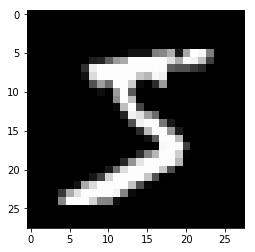

In [11]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap = 'gray')

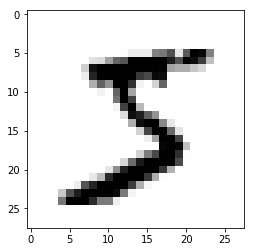

In [12]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap = 'gist_yarg')

In [13]:
torch.manual_seed(42)

In [14]:
train_load = DataLoader(train_data, batch_size = 100, shuffle = True)
test_load = DataLoader(test_data, batch_size = 500, shuffle = False)

Labels [   8    1    4    6    3    4    0    2    7    6    4    0]


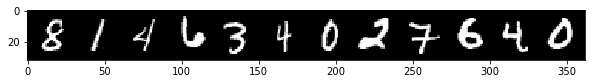

In [15]:
from torchvision.utils import make_grid
np.set_printoptions(formatter = dict(int = lambda x: f'{x:4}'))

for images, labels in train_load:
    break
    
print ('Labels', labels[:12].numpy())

im = make_grid(images[:12], nrow = 12)
plt.figure(figsize = (10, 4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [16]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz = 784, out_sz = 10, layers = [120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim = 1)

In [17]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item: > 6}')
        
    print(f'_____\n{sum(params): > 6}')

In [19]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
_____
 105214


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [21]:
for images, labels in train_load:
    print('Batch_shape:' ,images.size())
    break

Batch_shape: torch.Size([100, 1, 28, 28])


In [22]:
images.view(100,-1).size()

torch.Size([100, 784])

In [23]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range (epochs):
    trn_correct = 0
    tst_correct = 0
    
    for b, (X_train, y_train) in enumerate (train_load):
        b += 1
        
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_correct += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b % 200 == 0:
            print(f'epoch:{i:2} batch:{b:4} [{100*b:6}/60000] loss: {loss.item():10.8f} accuracy: {trn_correct.item()*100/(100*b):7.3f}%')
                
                  
    train_losses.append(loss)
    train_correct.append(trn_correct)
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate (test_load):
            y_val = model(X_test.view(500, -1))
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_correct += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_correct)
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')
        
                  
                  

epoch: 0 batch: 200 [ 20000/60000] loss: 0.35221729 accuracy:  82.695%
epoch: 0 batch: 400 [ 40000/60000] loss: 0.32761696 accuracy:  87.340%
epoch: 0 batch: 600 [ 60000/60000] loss: 0.31156573 accuracy:  89.490%
epoch: 1 batch: 200 [ 20000/60000] loss: 0.20120716 accuracy:  94.800%
epoch: 1 batch: 400 [ 40000/60000] loss: 0.14656080 accuracy:  95.185%
epoch: 1 batch: 600 [ 60000/60000] loss: 0.12691295 accuracy:  95.478%
epoch: 2 batch: 200 [ 20000/60000] loss: 0.13621397 accuracy:  96.815%
epoch: 2 batch: 400 [ 40000/60000] loss: 0.07235762 accuracy:  96.790%
epoch: 2 batch: 600 [ 60000/60000] loss: 0.04241361 accuracy:  96.878%
epoch: 3 batch: 200 [ 20000/60000] loss: 0.09474986 accuracy:  97.635%
epoch: 3 batch: 400 [ 40000/60000] loss: 0.06394158 accuracy:  97.600%
epoch: 3 batch: 600 [ 60000/60000] loss: 0.07836705 accuracy:  97.562%
epoch: 4 batch: 200 [ 20000/60000] loss: 0.05509189 accuracy:  98.135%
epoch: 4 batch: 400 [ 40000/60000] loss: 0.06395338 accuracy:  98.125%
epoch:

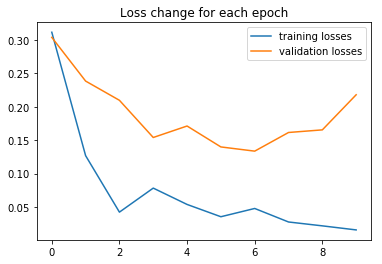

In [24]:
plt.plot(train_losses, label = 'training losses')
plt.plot(test_losses, label = 'validation losses')
plt.title('Loss change for each epoch')
plt.legend();

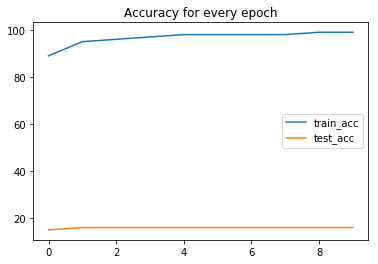

In [25]:
plt.plot([t/600 for t in train_correct], label = 'train_acc')
plt.plot([t/600 for t in test_correct], label = 'test_acc')
plt.title('Accuracy for every epoch')
plt.legend();

In [26]:
print(test_correct)

[tensor(9439), tensor(9635), tensor(9666), tensor(9726), tensor(9746), tensor(9763), tensor(9744), tensor(9756), tensor(9749), tensor(9704)]


In [28]:
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%')

Test accuracy: 97.040%


In [29]:
test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [32]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9704/10000 =  97.040%


In [39]:
np.set_printoptions(formatter = dict(int = lambda x:f'{x:4}'))
print( np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 971    0    3    0    2    2    6    0    5    1]
 [   0 1123    4    0    0    0    2    5    1    4]
 [   2    3 1000    5    5    0    0   11    6    0]
 [   1    1    6  979    0    2    1    3    5    7]
 [   0    0    1    0  962    1    4    1    3   16]
 [   2    1    2   18    1  884   35    1   19   14]
 [   0    2    1    0    4    1  909    0    1    0]
 [   1    1    7    5    3    2    0 1002    9    9]
 [   2    4    8    2    1    0    1    0  921    5]
 [   1    0    0    1    4    0    0    5    4  953]]


Yukarıda bulunan confusion matrixte değerler hangi sayı için hangi sayının tahmin edildiğini göstermektedir.

In [40]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i).astype('int64')

len (misses)
                                             
                                    

296

In [45]:
misses

array([  61,   62,   81,  104,  151,  217,  247,  259,  320,  321,  359,
        381,  386,  439,  445,  495,  530,  578,  582,  619,  659,  691,
        844,  877,  882,  924,  938,  947,  951,  956,  965, 1014, 1039,
       1050, 1107, 1112, 1128, 1156, 1166, 1178, 1182, 1202, 1226, 1232,
       1242, 1247, 1292, 1299, 1319, 1328, 1393, 1458, 1500, 1522, 1527,
       1530, 1531, 1549, 1553, 1554, 1587, 1597, 1609, 1616, 1671, 1681,
       1717, 1751, 1754, 1828, 1878, 1901, 1941, 1952, 1982, 1984, 1987,
       2004, 2024, 2043, 2047, 2070, 2093, 2105, 2109, 2118, 2129, 2135,
       2174, 2182, 2215, 2272, 2293, 2329, 2387, 2406, 2414, 2426, 2433,
       2488, 2534, 2582, 2607, 2618, 2648, 2654, 2720, 2769, 2860, 2863,
       2877, 2896, 2927, 2930, 2939, 2976, 2995, 3060, 3172, 3284, 3289,
       3342, 3422, 3474, 3503, 3520, 3549, 3550, 3558, 3559, 3567, 3618,
       3662, 3674, 3681, 3688, 3727, 3744, 3749, 3751, 3757, 3780, 3796,
       3808, 3811, 3838, 3850, 3853, 3893, 3906, 39

In [46]:
misses[:10]

array([  61,   62,   81,  104,  151,  217,  247,  259,  320,  321],
      dtype=int64)

In [47]:
r = 12
row = iter(np.array_split(misses, len(misses)//r+1))


Index: [  61   62   81  104  151  217  247  259  320  321  359  381]
Label: [   8    9    6    9    9    6    4    6    9    2    9    3]
Guess: [   2    5    5    5    8    5    2    0    8    7    4    7]


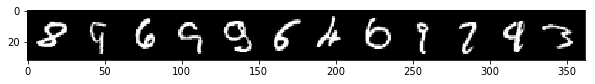

In [48]:
nextrow = next(row)
print('Index:', nextrow)
print('Label:', y_test.index_select(0, torch.tensor(nextrow)).numpy())
print('Guess:', predicted.index_select(0, torch.tensor(nextrow)).numpy())

images = X_test.index_select(0, torch.tensor(nextrow))
im = make_grid(images, nrow = r)
plt.figure(figsize = (10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)));